<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1w5HIG2LsuVnhhuEYfRvpBn4hHziWj_wW" width = "300" align="center"/>

El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df = df.set_index('id')
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}) # target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.

Vemos que no hay datos nulos:

In [3]:
df.isna().sum().sum()

0

Vemos que todos los datos son float:

In [4]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Vemos que area_mean y area_worst tienen desviaciones estandar de 351 y 569 lo cual es muy alto

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vemos por boxplots que hay outlayers

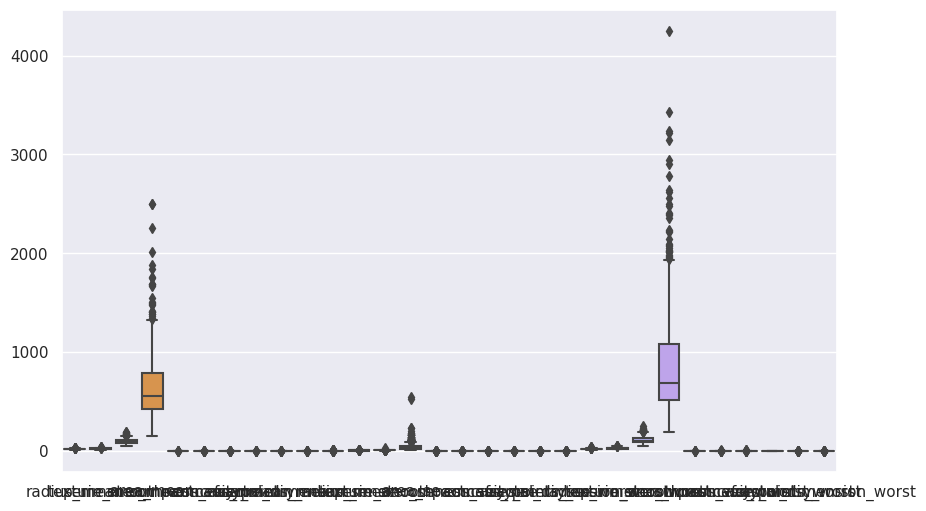

In [6]:
columnas=df.columns
columnas=columnas.drop('diagnosis')
plt.figure(figsize=(10,6))
sns.boxplot(df[columnas]).set(ylabel='')
plt.show()

tenemos 569 datos

In [7]:
df.shape

(569, 31)

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [8]:
#Separamos X e Y
columnas = df.columns.drop('diagnosis')
X=df[columnas]
Y=df['diagnosis']
#Realizare un train_test_split despues
#Scaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

3. Realizar un método de reducción de dimensionalidad visto en clases.

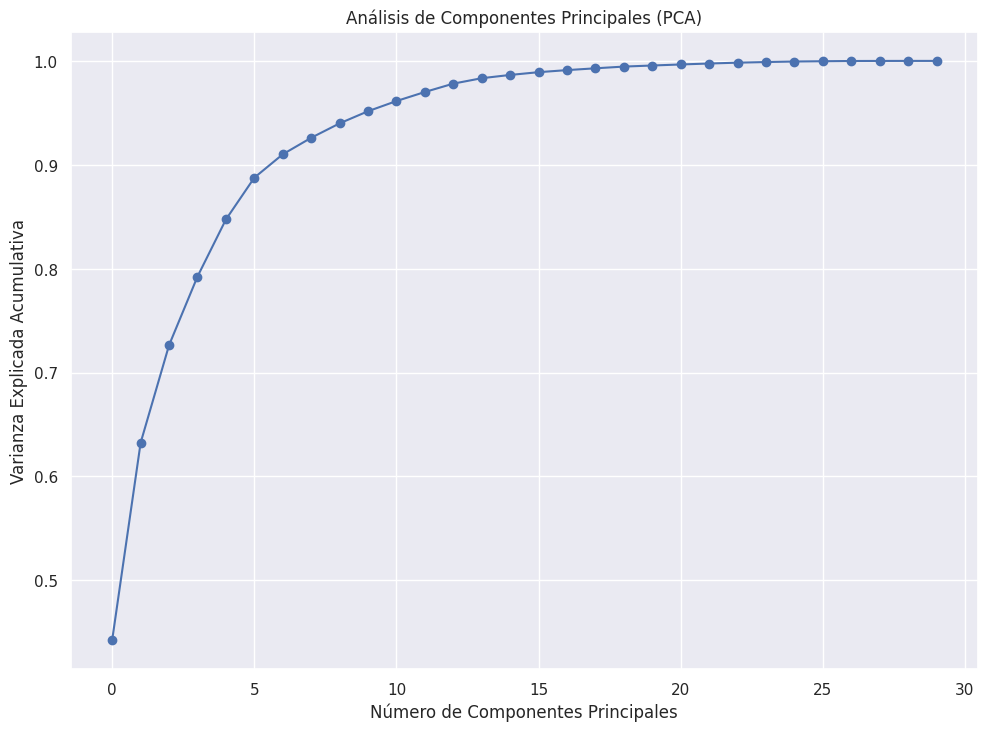

In [9]:
# Realiza PCA
pca = PCA()
pca.fit(X_scaled)

# Grafica la varianza explicada acumulativa
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA)')
plt.grid(True)
plt.show()


Por regla del codo se elige 5 compenentes principales

In [10]:
pca = PCA(n_components=5)
#Ahora hagamos un train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=321893)
pca.fit(X_train)  #Evitemos fuga de datos
X_train=pca.transform(X_train) #X transformado
X_test=pca.transform(X_test)

4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [11]:
#modelos
randomfor = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=192)
logistic = LogisticRegression()
svm = SVC()
randomfor.fit(X_train,y_train)
logistic.fit(X_train,y_train)
svm.fit(X_train,y_train)
print('Random Forest:')
print('train score:',randomfor.score(X_train,y_train))
print('test score:',randomfor.score(X_test,y_test))

print('Logistic Regression:')
print('train score:',logistic.score(X_train,y_train))
print('test score:',logistic.score(X_test,y_test))
print('Support Vector Machine:')
print('train score:',svm.score(X_train,y_train))
print('test score:',svm.score(X_test,y_test))

Random Forest:
train score: 0.9824120603015075
test score: 0.9298245614035088
Logistic Regression:
train score: 0.9547738693467337
test score: 0.935672514619883
Support Vector Machine:
train score: 0.9296482412060302
test score: 0.9064327485380117


Con esto verificamos que los modelos funcionan, (no son malos para el accuracy y el que mas overfitting tiene es Random Forest, pero es aceptable). Procedemos a hacer GridSearch para la optimizacion de hiperparametros.

In [12]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.01,0.1, 1, 10,20],           # Parámetro de regularización para SVC
    'kernel': ['linear', 'rbf']  # Tipo de kernel para SVC
}

# Configurar GridSearchCV con el modelo (SVC) y el espacio de búsqueda
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)  # 5-fold cross-validation

# Ajustar GridSearchCV a los datos de entrenamiento
grid.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid.best_params_)

# Evaluar el rendimiento en el conjunto de prueba
accuracy = grid.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

#Obtener el mejor
best_svc=grid.best_estimator_

Mejores hiperparámetros: {'C': 0.01, 'kernel': 'linear'}
Precisión en el conjunto de prueba: 0.95


In [13]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [1,5,25,50,100],           # Numero de arboles
    'criterion' : ['gini', 'entropy', 'log_loss'], # Criterio
    'max_depth': [2,5,7,10,25]       # Profundidad
}

# Configurar GridSearchCV con el modelo (RandomForestClassifier) y el espacio de búsqueda
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)  # 5-fold cross-validation

# Ajustar GridSearchCV a los datos de entrenamiento
grid.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid.best_params_)

# Evaluar el rendimiento en el conjunto de prueba
accuracy = grid.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

#Obtener el mejor
best_randomforest=grid.best_estimator_

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}
Precisión en el conjunto de prueba: 0.92


In [14]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'class_weight' : ['balanced', None],
    'C' :  [0.01,0.1, 1, 10,100]

}

# Configurar GridSearchCV con el modelo (LogisticRegression) y el espacio de búsqueda
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5)  # 5-fold cross-validation

# Ajustar GridSearchCV a los datos de entrenamiento
grid.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid.best_params_)

# Evaluar el rendimiento en el conjunto de prueba
accuracy = grid.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")
#Obtener el mejor
best_logistic=grid.best_estimator_

Mejores hiperparámetros: {'C': 0.1, 'class_weight': None}
Precisión en el conjunto de prueba: 0.93


In [15]:
y_pred = best_svc.predict(X_test)
report = classification_report(y_test, y_pred)
print("Informe de clasificación en el conjunto de prueba de SVC:\n", report)
y_pred = best_randomforest.predict(X_test)
report = classification_report(y_test, y_pred)
print("Informe de clasificación en el conjunto de prueba de RandomForest:\n", report)
y_pred = best_logistic.predict(X_test)
report = classification_report(y_test, y_pred)
print("Informe de clasificación en el conjunto de prueba de LogisticRegresion:\n", report)

Informe de clasificación en el conjunto de prueba de SVC:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.93      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Informe de clasificación en el conjunto de prueba de RandomForest:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       110
           1       0.94      0.84      0.89        61

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171

Informe de clasificación en el conjunto de prueba de LogisticRegresion:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       110
           1       0.92      0.89    

En Conclusión, SVC es el mejor de los 3, ya que, es mejor en todas las metricas de los reportes.